/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


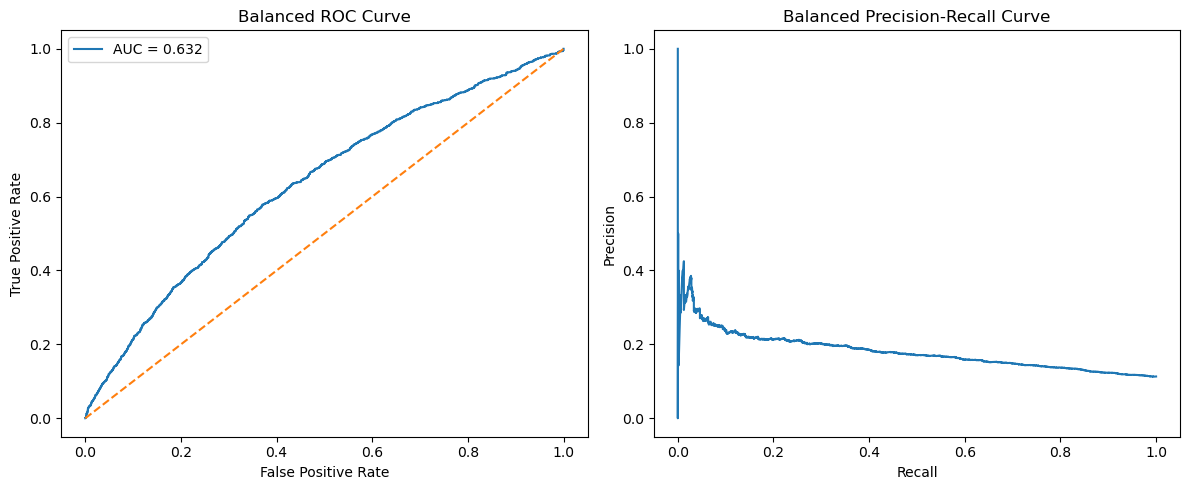

('              precision    recall  f1-score   support\n\n           0       0.92      0.65      0.76     10522\n           1       0.17      0.55      0.26      1341\n\n    accuracy                           0.64     11863\n   macro avg       0.54      0.60      0.51     11863\nweighted avg       0.83      0.64      0.71     11863\n',
 0.6320045170794447)

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

file_path = 'diabetic_heart_cleaned.csv'
df = pd.read_csv(file_path)

# Drop identifier and redundant columns
df_model = df.drop(columns=['encounter_id', 'patient_nbr', 'readmitted'])

# Separate features and target
X = df_model.drop(columns='readmitted_binary')
y = df_model['readmitted_binary']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include='number').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
])

balanced_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

balanced_pipeline.fit(X_train, y_train)

y_pred_bal = balanced_pipeline.predict(X_test)
y_proba_bal = balanced_pipeline.predict_proba(X_test)[:, 1]

classification_rep_bal = classification_report(y_test, y_pred_bal)
roc_auc_bal = roc_auc_score(y_test, y_proba_bal)

# ROC and Precision-Recall curves
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_proba_bal)
precision_bal, recall_bal, _ = precision_recall_curve(y_test, y_proba_bal)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_bal, tpr_bal, label=f'AUC = {roc_auc_bal:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Balanced ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_bal, precision_bal)
plt.title('Balanced Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.tight_layout()
plt.show()

classification_rep_bal, roc_auc_bal
